In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

# test_data = [
#     'i really love my dog',
#     'my dog loves my manatee'
# ]

# test_seq = tokenizer.texts_to_sequences(test_data)

padded = pad_sequences(sequences, padding = 'pre', 
                       truncating = 'post', maxlen = 10)
print(word_index)
print(sequences)
#print(test_seq)

print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  0  0  0  5  3  2  4]
 [ 0  0  0  0  0  0  5  3  2  7]
 [ 0  0  0  0  0  0  6  3  2  4]
 [ 0  0  0  8  6  9  2  4 10 11]]


In [24]:
cd NLP

C:\Users\Kiryl\Coursera\tensorflow\NLP


In [25]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0A6A-A6BB

 Directory of C:\Users\Kiryl\Coursera\tensorflow\NLP

02/06/20  09:52 PM    <DIR>          .
02/06/20  09:52 PM    <DIR>          ..
02/06/20  09:49 PM           884,338 bbc.zip
02/06/20  09:52 PM         5,057,493 bbc-text.csv
               2 File(s)      5,941,831 bytes
               2 Dir(s)  10,907,099,136 bytes free


In [26]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [27]:
len(stopwords)

153

In [28]:
import csv

In [29]:
sentences = []
labels = []
with open ("bbc-text.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

In [30]:
print(len(sentences))
print(len(labels))
print(sentences[2])

2225
2225
tigers wary farrell gamble leicester say will not rushed making bid andy farrell great britain rugby league captain decide switch codes. anybody else involved process still way away going next stage tigers boss john wells told bbc radio leicester. moment still lot unknowns andy farrell not least medical situation. whoever take going take big big gamble. farrell persistent knee problems operation knee five weeks ago expected another three months. leicester saracens believed head list rugby union clubs interested signing farrell decides move 15-man game. move across union wells believes better off playing backs least initially. m sure make step league union involved centre said wells. think england prefer progress position back row can make use rugby league skills within forwards. jury whether can cross divide. club balance will struck cost gamble option bringing ready-made replacement.


In [32]:
labels[2]

'sport'

In [33]:
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29714


In [37]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'post', maxlen = 100)

print(sequences[1])
print(padded.shape)
print(padded[0])

[1621, 611, 252, 1641, 1418, 127, 1621, 611, 5802, 1655, 662, 6975, 5219, 2003, 1823, 757, 294, 33, 2159, 1279, 4420, 28, 5480, 334, 6143, 33, 806, 4273, 858, 1878, 3854, 6, 1655, 5, 1436, 1621, 2, 383, 166, 53, 4274, 628, 2263, 604, 1856, 3049, 1204, 70, 2, 298, 6, 6143, 113, 2810, 1178, 757, 9757, 2263, 455, 858, 1580, 5001, 9758, 1265, 2446, 3517, 1780, 885, 9759, 458, 6, 6143, 373, 1474, 6, 1655, 27, 2159, 198, 5, 1581, 6, 6143, 3855, 373, 185, 6, 1655, 27, 2159, 1879, 1621, 1641, 6, 9758, 6520, 24, 3855, 4420, 6, 6143, 764, 2523, 2083, 2159, 4135, 3399, 127, 1621, 122, 318, 1598, 1692, 1315, 858, 1878, 497, 8821, 6, 1315, 764, 757, 4, 10926, 260, 559, 14977, 374, 1621, 2, 2159, 285, 672, 6, 1655, 153, 737, 320, 8105, 19527, 611, 5481, 10927, 7524, 1437, 2304, 8822, 6, 1655, 5803, 1621, 6521, 4603, 14978, 1654, 622, 3629, 7525, 568, 2218, 1621, 2, 383, 6144, 101, 504, 904, 1654, 2811, 10928, 584, 70, 1622, 4274, 1143, 243, 8106, 277, 38, 765, 243, 404, 6, 1655, 559, 102, 14, 18, 11

In [38]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

texts:
"cnn_dailymail"
"glue"
"imdb_reviews"
"lm1b"
"multi_nli"
"squad"
""wikipedia"
"xnli"

In [40]:
!pip install tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21498 sha256=0c4c2d26740ee6d53fb9463c405b8c1c7dadc870ea7546213b020f9956247950
  Stored in directory: c:\users\kiryl\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78597 sha256=eaa7865735e02857aadb8ce5f2e373ac9b6dd8f790ded53d83f46f5c0a1260ae
  Stored in directory: c:\users\kiryl\appdata\local\pip\cache\wheels\a4\61\fd\c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-py3-none-any.whl size=77601 sha256=78ae9673ccf1e8d00a0eb8f4d1e7807aff775ef6133bad9f9a572711b8650e42
  Stored in directory: c:\users\kiryl\appdata\local\pip\cache\wheels\4c\a1\71\5e427276ceeff277fd76878d1b19fbf4587a2845015d86864b
Successfully built promise dill googleapis-common-protos


In [41]:
import tensorflow_datasets as tfds

In [42]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Shuffling and writing examples to C:\Users\Kiryl\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteRFZQVO\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\Kiryl\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteRFZQVO\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\Kiryl\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteRFZQVO\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\Kiryl\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [43]:
import numpy as np

In [47]:
train_data, test_data = imdb['train'], imdb['test']

In [51]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [56]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [80]:
vocab_size = 1000
embedding_dim = 32
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [81]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

In [82]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [ ]:
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])

# print(decode_review(padded[1]))
# print(training_sentences[1])

***
***

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

num_epochs = 10
history = model.fit(padded, training_labels_final, epochs = num_epochs, 
                    validation_data=(testing_padded, testing_labels_final), verbose = 2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 32)           32000     
_________________________________________________________________
flatten_8 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 23046     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 55,053
Trainable params: 55,053
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 5s - loss: 0.5225 - accuracy: 0.7240 - val_loss: 0.3960 - val_accuracy: 0.8188
Epoch 2/10
25000/25000 - 3s - loss: 0.3713 - accuracy: 0.8360 - val_loss: 0.4114 - val_accura

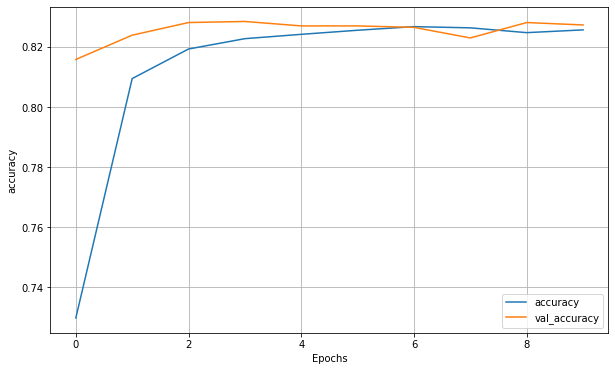

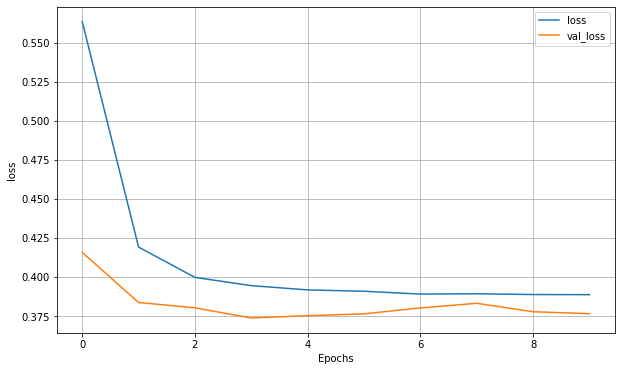

In [87]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.grid(True)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [88]:
# GlobalAveragePooling1D()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

num_epochs = 30
history = model.fit(padded, training_labels_final, epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final), verbose = 2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 32)           32000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 32,205
Trainable params: 32,205
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 - 4s - loss: 0.5694 - accuracy: 0.7227 - val_loss: 0.4145 - val_accuracy: 0.8114
Epoch 2/30
25000/25000 - 3s - loss: 0.4183 - accuracy: 0.8096 - val_loss: 0.3786 - val_accura

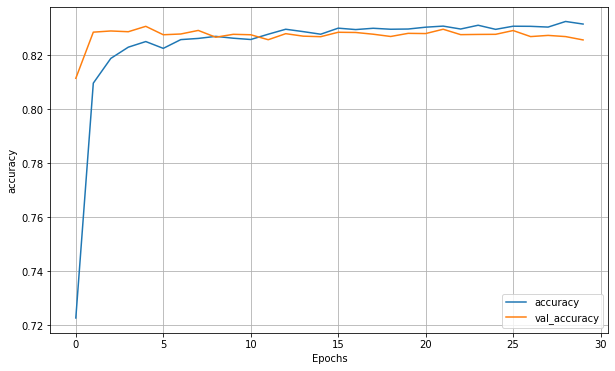

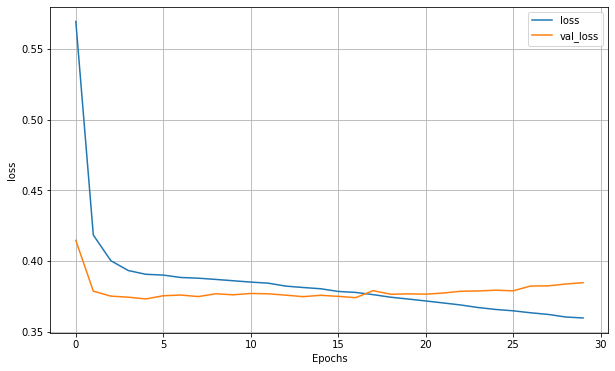

In [89]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")